<a href="https://colab.research.google.com/github/samuelhtampubolon/game-kartu-24/blob/main/System_Diagram_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install graphviz

from graphviz import Digraph

def create_diagram(components, connections, filename):
    """
    Creates a directed graph diagram using Graphviz.

    Parameters:
    - components: List of component names (strings).
    - connections: List of tuples (from_node, to_node, label) representing connections.
    - filename: Name of the output file (without extension).
    """
    dot = Digraph(comment=filename)

    # Add nodes for each component
    for component in components:
        dot.node(component, component)

    # Add edges for each connection
    for conn in connections:
        from_node, to_node, label = conn
        if label:  # If there's a label, include it
            dot.edge(from_node, to_node, label=label)
        else:  # Otherwise, create an edge without a label
            dot.edge(from_node, to_node)

    # Render the diagram to a PNG file
    dot.render(filename, format='png', cleanup=True)



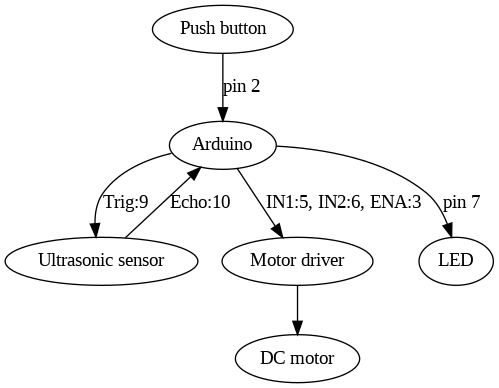

In [11]:
# Option 1: Basic Smart Conveyor System
components1 = [
    'Arduino', 'Ultrasonic sensor', 'Motor driver', 'DC motor', 'LED', 'Push button'
]
connections1 = [
    ('Arduino', 'Ultrasonic sensor', 'Trig:9'),
    ('Ultrasonic sensor', 'Arduino', 'Echo:10'),
    ('Arduino', 'Motor driver', 'IN1:5, IN2:6, ENA:3'),
    ('Motor driver', 'DC motor', ''),
    ('Arduino', 'LED', 'pin 7'),
    ('Push button', 'Arduino', 'pin 2')
]
create_diagram(components1, connections1, 'option1')

from IPython.display import Image, display
display(Image('option1.png'))

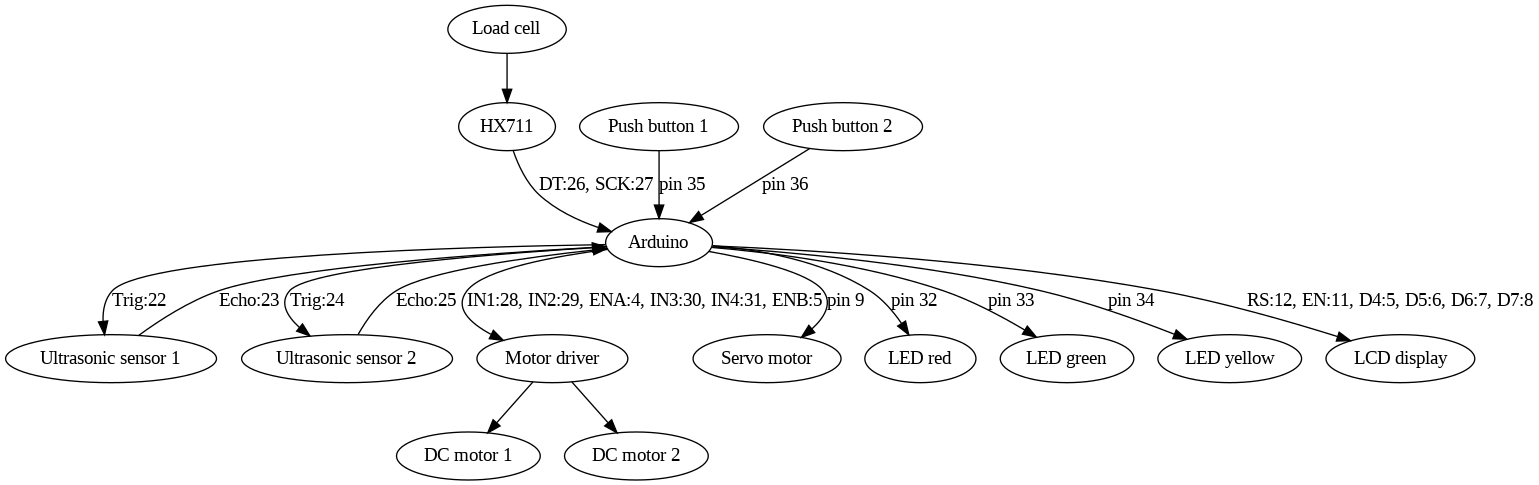

In [12]:
# Option 2: Intermediate Smart Conveyor System
components2 = [
    'Arduino', 'Ultrasonic sensor 1', 'Ultrasonic sensor 2', 'Load cell', 'HX711',
    'Motor driver', 'DC motor 1', 'DC motor 2', 'Servo motor', 'LED red', 'LED green',
    'LED yellow', 'Push button 1', 'Push button 2', 'LCD display'
]
connections2 = [
    ('Arduino', 'Ultrasonic sensor 1', 'Trig:22'),
    ('Ultrasonic sensor 1', 'Arduino', 'Echo:23'),
    ('Arduino', 'Ultrasonic sensor 2', 'Trig:24'),
    ('Ultrasonic sensor 2', 'Arduino', 'Echo:25'),
    ('HX711', 'Arduino', 'DT:26, SCK:27'),
    ('Load cell', 'HX711', ''),
    ('Arduino', 'Motor driver', 'IN1:28, IN2:29, ENA:4, IN3:30, IN4:31, ENB:5'),
    ('Motor driver', 'DC motor 1', ''),
    ('Motor driver', 'DC motor 2', ''),
    ('Arduino', 'Servo motor', 'pin 9'),
    ('Arduino', 'LED red', 'pin 32'),
    ('Arduino', 'LED green', 'pin 33'),
    ('Arduino', 'LED yellow', 'pin 34'),
    ('Push button 1', 'Arduino', 'pin 35'),
    ('Push button 2', 'Arduino', 'pin 36'),
    ('Arduino', 'LCD display', 'RS:12, EN:11, D4:5, D5:6, D6:7, D7:8')
]
create_diagram(components2, connections2, 'option2')

from IPython.display import Image, display
display(Image('option2.png'))

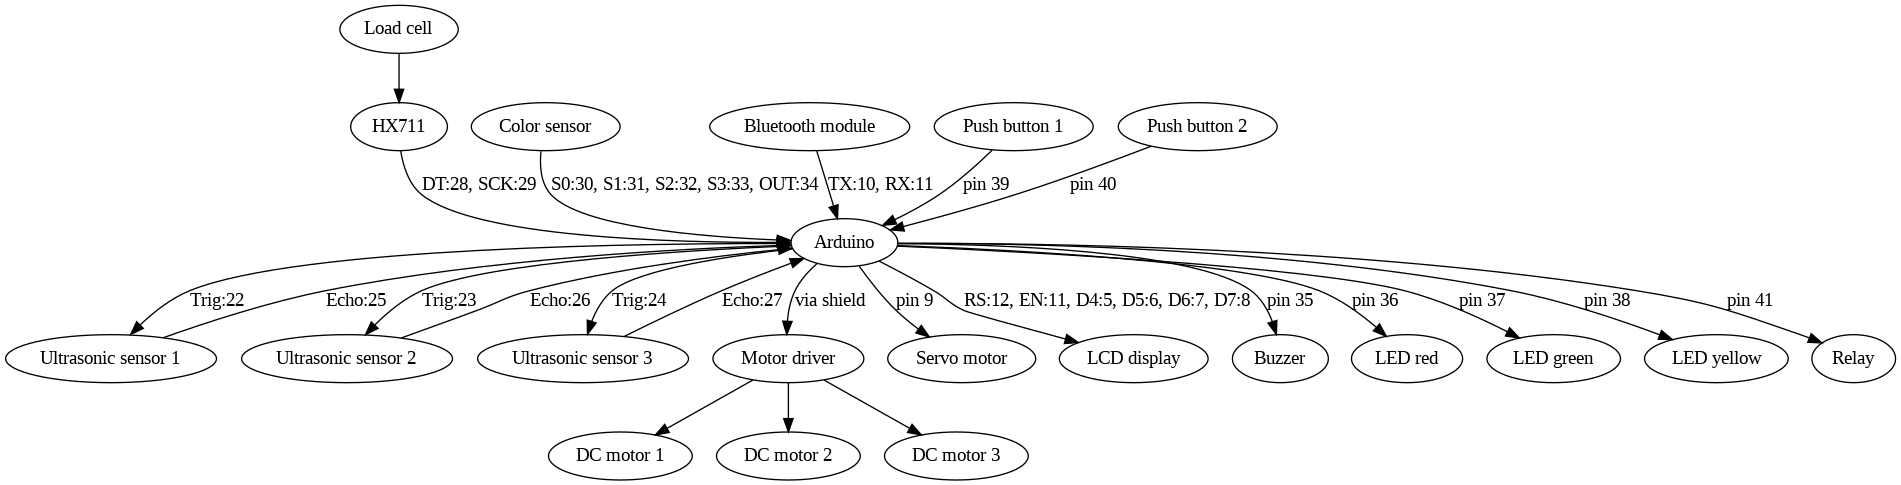

In [13]:
# Option 3: Advanced Smart Conveyor System
components3 = [
    'Arduino', 'Ultrasonic sensor 1', 'Ultrasonic sensor 2', 'Ultrasonic sensor 3',
    'Load cell', 'HX711', 'Color sensor', 'Motor driver', 'DC motor 1', 'DC motor 2',
    'DC motor 3', 'Servo motor', 'Bluetooth module', 'LCD display', 'Buzzer', 'LED red',
    'LED green', 'LED yellow', 'Push button 1', 'Push button 2', 'Relay'
]
connections3 = [
    ('Arduino', 'Ultrasonic sensor 1', 'Trig:22'),
    ('Ultrasonic sensor 1', 'Arduino', 'Echo:25'),
    ('Arduino', 'Ultrasonic sensor 2', 'Trig:23'),
    ('Ultrasonic sensor 2', 'Arduino', 'Echo:26'),
    ('Arduino', 'Ultrasonic sensor 3', 'Trig:24'),
    ('Ultrasonic sensor 3', 'Arduino', 'Echo:27'),
    ('HX711', 'Arduino', 'DT:28, SCK:29'),
    ('Load cell', 'HX711', ''),
    ('Color sensor', 'Arduino', 'S0:30, S1:31, S2:32, S3:33, OUT:34'),
    ('Arduino', 'Motor driver', 'via shield'),
    ('Motor driver', 'DC motor 1', ''),
    ('Motor driver', 'DC motor 2', ''),
    ('Motor driver', 'DC motor 3', ''),
    ('Arduino', 'Servo motor', 'pin 9'),
    ('Bluetooth module', 'Arduino', 'TX:10, RX:11'),
    ('Arduino', 'LCD display', 'RS:12, EN:11, D4:5, D5:6, D6:7, D7:8'),
    ('Arduino', 'Buzzer', 'pin 35'),
    ('Arduino', 'LED red', 'pin 36'),
    ('Arduino', 'LED green', 'pin 37'),
    ('Arduino', 'LED yellow', 'pin 38'),
    ('Push button 1', 'Arduino', 'pin 39'),
    ('Push button 2', 'Arduino', 'pin 40'),
    ('Arduino', 'Relay', 'pin 41')
]
create_diagram(components3, connections3, 'option3')

from IPython.display import Image, display
display(Image('option3.png'))

In [29]:
!pip install simpy

import simpy
import random

# Define the Object class to represent items on the conveyor
class Object:
    def __init__(self, id, weight, color):
        self.id = id
        self.weight = weight
        self.color = color

# Process for each object moving through the conveyor system
def conveyor_process(env, obj):
    print(f"Object {obj.id} arrives at entry sensor at {env.now:.2f}")
    yield env.timeout(10)  # Travel time to weight sensor (10 seconds)
    print(f"Object {obj.id} arrives at weight sensor at {env.now:.2f}")
    if obj.weight > 1.0:
        print(f"Object {obj.id} is heavy ({obj.weight:.2f} kg), sorting by weight...")
        yield env.timeout(2)  # Sorting action takes 2 seconds
        print(f"Object {obj.id} sorted by weight at {env.now:.2f}")
        global sorted_weight
        sorted_weight += 1
    else:
        print(f"Object {obj.id} is light, continuing...")
        yield env.timeout(10)  # Travel time to color sensor (10 seconds)
        print(f"Object {obj.id} arrives at color sensor at {env.now:.2f}")
        if obj.color == 'red':
            print(f"Object {obj.id} is red, sorting by color...")
            yield env.timeout(2)  # Sorting action takes 2 seconds
            print(f"Object {obj.id} sorted by color at {env.now:.2f}")
            global sorted_color
            sorted_color += 1
        else:
            print(f"Object {obj.id} is not red, continuing...")
            yield env.timeout(10)  # Travel time to end (10 seconds)
            print(f"Object {obj.id} reaches end at {env.now:.2f}")
            global reached_end
            reached_end += 1

# Generator process to create objects at random intervals
def object_generator(env):
    id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / 5))  # Average 5 seconds between arrivals
        id += 1
        weight = random.uniform(0.5, 2.0)  # Random weight between 0.5 and 2.0 kg
        color = random.choice(['red', 'green', 'blue'])  # Random color
        obj = Object(id, weight, color)
        env.process(conveyor_process(env, obj))

# Initialize global counters for statistics
sorted_weight = 0
sorted_color = 0
reached_end = 0

# Set up and run the simulation
env = simpy.Environment()
env.process(object_generator(env))
env.run(until=100)  # Simulate for 100 seconds

# Print simulation results
print(f"\nSimulation Results:")
print(f"Sorted by weight: {sorted_weight}")
print(f"Sorted by color: {sorted_color}")
print(f"Reached end: {reached_end}")

Object 1 arrives at entry sensor at 6.54
Object 2 arrives at entry sensor at 6.95
Object 3 arrives at entry sensor at 11.77
Object 4 arrives at entry sensor at 12.84
Object 5 arrives at entry sensor at 14.13
Object 1 arrives at weight sensor at 16.54
Object 1 is heavy (1.30 kg), sorting by weight...
Object 2 arrives at weight sensor at 16.95
Object 2 is light, continuing...
Object 1 sorted by weight at 18.54
Object 3 arrives at weight sensor at 21.77
Object 3 is heavy (1.79 kg), sorting by weight...
Object 4 arrives at weight sensor at 22.84
Object 4 is light, continuing...
Object 3 sorted by weight at 23.77
Object 6 arrives at entry sensor at 23.80
Object 5 arrives at weight sensor at 24.13
Object 5 is light, continuing...
Object 7 arrives at entry sensor at 25.43
Object 8 arrives at entry sensor at 26.31
Object 2 arrives at color sensor at 26.95
Object 2 is not red, continuing...
Object 9 arrives at entry sensor at 27.87
Object 10 arrives at entry sensor at 28.24
Object 4 arrives at 

In [15]:
!pip install simpy
import simpy
import random

# Define the Object class to represent items on the conveyor
class Object:
    def __init__(self, id, weight, color):
        self.id = id
        self.weight = weight
        self.color = color

# Process for each object moving through the conveyor system
def conveyor_process(env, obj):
    print(f"Object {obj.id} arrives at entry sensor at {env.now:.2f}")
    yield env.timeout(10)  # Travel time to weight sensor (10 seconds)
    print(f"Object {obj.id} arrives at weight sensor at {env.now:.2f}")
    if obj.weight > 1.0:
        print(f"Object {obj.id} is heavy ({obj.weight:.2f} kg), sorting by weight...")
        yield env.timeout(2)  # Sorting action takes 2 seconds
        print(f"Object {obj.id} sorted by weight at {env.now:.2f}")
        global sorted_weight
        sorted_weight += 1
    else:
        print(f"Object {obj.id} is light, continuing...")
        yield env.timeout(10)  # Travel time to color sensor (10 seconds)
        print(f"Object {obj.id} arrives at color sensor at {env.now:.2f}")
        if obj.color == 'red':
            print(f"Object {obj.id} is red, sorting by color...")
            yield env.timeout(2)  # Sorting action takes 2 seconds
            print(f"Object {obj.id} sorted by color at {env.now:.2f}")
            global sorted_color
            sorted_color += 1
        else:
            print(f"Object {obj.id} is not red, continuing...")
            yield env.timeout(10)  # Travel time to end (10 seconds)
            print(f"Object {obj.id} reaches end at {env.now:.2f}")
            global reached_end
            reached_end += 1

# Generator process to create objects at random intervals
def object_generator(env):
    id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / 5))  # Average 5 seconds between arrivals
        id += 1
        weight = random.uniform(0.5, 2.0)  # Random weight between 0.5 and 2.0 kg
        color = random.choice(['red', 'green', 'blue'])  # Random color
        obj = Object(id, weight, color)
        env.process(conveyor_process(env, obj))

# Initialize global counters for statistics
sorted_weight = 0
sorted_color = 0
reached_end = 0

# Set up and run the simulation
env = simpy.Environment()
env.process(object_generator(env))
env.run(until=100)  # Simulate for 100 seconds

# Print simulation results
print(f"\nSimulation Results:")
print(f"Sorted by weight: {sorted_weight}")
print(f"Sorted by color: {sorted_color}")
print(f"Reached end: {reached_end}")

Object 1 arrives at entry sensor at 5.07
Object 2 arrives at entry sensor at 7.81
Object 1 arrives at weight sensor at 15.07
Object 1 is heavy (1.39 kg), sorting by weight...
Object 3 arrives at entry sensor at 16.43
Object 1 sorted by weight at 17.07
Object 2 arrives at weight sensor at 17.81
Object 2 is light, continuing...
Object 4 arrives at entry sensor at 19.88
Object 5 arrives at entry sensor at 23.75
Object 3 arrives at weight sensor at 26.43
Object 3 is heavy (1.75 kg), sorting by weight...
Object 2 arrives at color sensor at 27.81
Object 2 is not red, continuing...
Object 3 sorted by weight at 28.43
Object 4 arrives at weight sensor at 29.88
Object 4 is light, continuing...
Object 5 arrives at weight sensor at 33.75
Object 5 is light, continuing...
Object 6 arrives at entry sensor at 37.49
Object 2 reaches end at 37.81
Object 4 arrives at color sensor at 39.88
Object 4 is not red, continuing...
Object 7 arrives at entry sensor at 43.22
Object 5 arrives at color sensor at 43.7

In [18]:
!pip install simpy

import simpy
import random

# Define the Object class to represent items on the conveyor
class Object:
    def __init__(self, id, weight, color):
        self.id = id
        self.weight = weight
        self.color = color

# Process for each object moving through the conveyor system
def conveyor_process(env, obj):
    print(f"Object {obj.id} arrives at entry sensor at {env.now:.2f}")
    yield env.timeout(10)  # Travel time to weight sensor (10 seconds)
    print(f"Object {obj.id} arrives at weight sensor at {env.now:.2f}")
    if obj.weight > 1.0:
        print(f"Object {obj.id} is heavy ({obj.weight:.2f} kg), sorting by weight...")
        yield env.timeout(2)  # Sorting action takes 2 seconds
        print(f"Object {obj.id} sorted by weight at {env.now:.2f}")
        global sorted_weight
        sorted_weight += 1
    else:
        print(f"Object {obj.id} is light, continuing...")
        yield env.timeout(10)  # Travel time to color sensor (10 seconds)
        print(f"Object {obj.id} arrives at color sensor at {env.now:.2f}")
        if obj.color == 'red':
            print(f"Object {obj.id} is red, sorting by color...")
            yield env.timeout(2)  # Sorting action takes 2 seconds
            print(f"Object {obj.id} sorted by color at {env.now:.2f}")
            global sorted_color
            sorted_color += 1
        else:
            print(f"Object {obj.id} is not red, continuing...")
            yield env.timeout(10)  # Travel time to end (10 seconds)
            print(f"Object {obj.id} reaches end at {env.now:.2f}")
            global reached_end
            reached_end += 1

# Generator process to create objects at random intervals
def object_generator(env):
    id = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / 5))  # Average 5 seconds between arrivals
        id += 1
        weight = random.uniform(0.5, 2.0)  # Random weight between 0.5 and 2.0 kg
        color = random.choice(['red', 'green', 'blue'])  # Random color
        obj = Object(id, weight, color)
        env.process(conveyor_process(env, obj))

# Initialize global counters for statistics
sorted_weight = 0
sorted_color = 0
reached_end = 0

# Set up and run the simulation
env = simpy.Environment()
env.process(object_generator(env))
env.run(until=100)  # Simulate for 100 seconds

# Print simulation results
print(f"\nSimulation Results:")
print(f"Sorted by weight: {sorted_weight}")
print(f"Sorted by color: {sorted_color}")
print(f"Reached end: {reached_end}")

Object 1 arrives at entry sensor at 2.27
Object 1 arrives at weight sensor at 12.27
Object 1 is light, continuing...
Object 2 arrives at entry sensor at 18.97
Object 3 arrives at entry sensor at 21.00
Object 1 arrives at color sensor at 22.27
Object 1 is not red, continuing...
Object 4 arrives at entry sensor at 24.43
Object 2 arrives at weight sensor at 28.97
Object 2 is heavy (1.84 kg), sorting by weight...
Object 2 sorted by weight at 30.97
Object 3 arrives at weight sensor at 31.00
Object 3 is heavy (1.74 kg), sorting by weight...
Object 1 reaches end at 32.27
Object 3 sorted by weight at 33.00
Object 4 arrives at weight sensor at 34.43
Object 4 is heavy (1.53 kg), sorting by weight...
Object 4 sorted by weight at 36.43
Object 5 arrives at entry sensor at 44.91
Object 5 arrives at weight sensor at 54.91
Object 5 is heavy (1.64 kg), sorting by weight...
Object 5 sorted by weight at 56.91
Object 6 arrives at entry sensor at 66.61
Object 7 arrives at entry sensor at 68.69
Object 8 arr

In [22]:
!pip install simpy

import simpy
import random
import statistics

# --- Simulation Parameters ---
RANDOM_SEED = 42  # For reproducibility
SIMULATION_TIME = 1000  # Total simulation time in minutes
PARTS_TO_GENERATE = 50 # Stop source after this many parts (or use SIMULATION_TIME)

# Part generation parameters
PART_INTERARRIVAL_TIME_MEAN = 10.0  # Average time (minutes) between part arrivals (exponential distribution)

# Machine parameters
MACHINE_1_PROCESS_TIME_MEAN = 6.0   # Average processing time (minutes) for Machine 1
MACHINE_1_PROCESS_TIME_STDDEV = 1.0 # Standard deviation for Machine 1 (normal distribution)
MACHINE_2_PROCESS_TIME_MEAN = 8.0   # Average processing time (minutes) for Machine 2
MACHINE_2_PROCESS_TIME_STDDEV = 1.5 # Standard deviation for Machine 2

# Data collection
part_arrival_times = {}
part_departure_times = {}
part_wait_times_m1 = []
part_wait_times_m2 = []
machine_1_utilization_time = 0
machine_2_utilization_time = 0

# --- Model Components ---

class Part:
    """ Represents a part moving through the system. """
    def __init__(self, env, name, machine_1, machine_2):
        self.env = env
        self.name = name
        self.machine_1 = machine_1
        self.machine_2 = machine_2
        self.arrival_time_system = env.now
        part_arrival_times[self.name] = self.arrival_time_system
        print(f"{env.now:.2f}: {self.name} ARRIVED in system.")

        # Start the process for this part
        self.process_handle = env.process(self.run())

    def run(self):
        global machine_1_utilization_time, machine_2_utilization_time

        # --- Process at Machine 1 ---
        arrival_time_m1_queue = self.env.now
        with self.machine_1.request() as req:
            yield req  # Request the machine (wait if busy)
            wait_time_m1 = self.env.now - arrival_time_m1_queue
            part_wait_times_m1.append(wait_time_m1)
            print(f"{self.env.now:.2f}: {self.name} STARTED on Machine 1 (waited {wait_time_m1:.2f})")

            process_time_m1 = abs(random.normalvariate(MACHINE_1_PROCESS_TIME_MEAN, MACHINE_1_PROCESS_TIME_STDDEV))
            yield self.env.timeout(process_time_m1) # Simulate processing time
            machine_1_utilization_time += process_time_m1
            print(f"{self.env.now:.2f}: {self.name} FINISHED on Machine 1 (processed in {process_time_m1:.2f})")

        # --- Process at Machine 2 ---
        arrival_time_m2_queue = self.env.now
        with self.machine_2.request() as req:
            yield req # Request the machine
            wait_time_m2 = self.env.now - arrival_time_m2_queue
            part_wait_times_m2.append(wait_time_m2)
            print(f"{self.env.now:.2f}: {self.name} STARTED on Machine 2 (waited {wait_time_m2:.2f})")

            process_time_m2 = abs(random.normalvariate(MACHINE_2_PROCESS_TIME_MEAN, MACHINE_2_PROCESS_TIME_STDDEV))
            yield self.env.timeout(process_time_m2)
            machine_2_utilization_time += process_time_m2
            print(f"{self.env.now:.2f}: {self.name} FINISHED on Machine 2 (processed in {process_time_m2:.2f})")

        # Part departs system
        part_departure_times[self.name] = self.env.now
        print(f"{self.env.now:.2f}: {self.name} DEPARTED system.")


def source(env, machine_1, machine_2):
    """ Generates parts based on inter-arrival times. """
    for i in range(PARTS_TO_GENERATE):
        # Wait for the next arrival
        interarrival_time = random.expovariate(1.0 / PART_INTERARRIVAL_TIME_MEAN)
        yield env.timeout(interarrival_time)

        part_name = f"Part_{i+1}"
        Part(env, part_name, machine_1, machine_2) # Create a new part process


# --- Main Simulation Setup ---
print("--- Production Line Simulation Starting ---")
random.seed(RANDOM_SEED)

# Create a SimPy environment
env = simpy.Environment()

# Create resources (machines)
# Capacity=1 means only one part can be processed at a time
machine_1 = simpy.Resource(env, capacity=1)
machine_2 = simpy.Resource(env, capacity=1)

# Start the source process
env.process(source(env, machine_1, machine_2))

# Run the simulation
env.run(until=SIMULATION_TIME)

print("\n--- Simulation Finished ---")

# --- Calculate and Print Statistics ---
total_parts_processed = len(part_departure_times)
print(f"\nTotal parts generated: {PARTS_TO_GENERATE}")
print(f"Total parts processed and departed: {total_parts_processed}")

if total_parts_processed > 0:
    times_in_system = [(part_departure_times[name] - part_arrival_times[name])
                       for name in part_departure_times if name in part_arrival_times]

    avg_time_in_system = statistics.mean(times_in_system) if times_in_system else 0
    max_time_in_system = max(times_in_system) if times_in_system else 0
    min_time_in_system = min(times_in_system) if times_in_system else 0

    avg_wait_time_m1 = statistics.mean(part_wait_times_m1) if part_wait_times_m1 else 0
    avg_wait_time_m2 = statistics.mean(part_wait_times_m2) if part_wait_times_m2 else 0

    utilization_m1 = (machine_1_utilization_time / SIMULATION_TIME) * 100 if SIMULATION_TIME > 0 else 0
    utilization_m2 = (machine_2_utilization_time / SIMULATION_TIME) * 100 if SIMULATION_TIME > 0 else 0


    print(f"\nAverage time in system per part: {avg_time_in_system:.2f} minutes")
    print(f"Max time in system per part: {max_time_in_system:.2f} minutes")
    print(f"Min time in system per part: {min_time_in_system:.2f} minutes")

    print(f"\nAverage wait time for Machine 1: {avg_wait_time_m1:.2f} minutes")
    print(f"Average wait time for Machine 2: {avg_wait_time_m2:.2f} minutes")

    print(f"\nMachine 1 utilization: {utilization_m1:.2f}%")
    print(f"Machine 2 utilization: {utilization_m2:.2f}%")

    # Number of parts still in system (WIP - Work In Progress)
    wip = 0
    for i in range(PARTS_TO_GENERATE):
        part_name = f"Part_{i+1}"
        if part_name in part_arrival_times and part_name not in part_departure_times:
            wip +=1
            # print(f"Part {part_name} still in system. Arrived at {part_arrival_times[part_name]:.2f}")
    print(f"Work In Progress (WIP) at end of simulation: {wip} parts")

else:
    print("No parts completed processing.")

--- Production Line Simulation Starting ---
10.20: Part_1 ARRIVED in system.
10.20: Part_1 STARTED on Machine 1 (waited 0.00)
10.45: Part_2 ARRIVED in system.
15.70: Part_1 FINISHED on Machine 1 (processed in 5.50)
15.70: Part_1 STARTED on Machine 2 (waited 0.00)
15.70: Part_2 STARTED on Machine 1 (waited 5.25)
20.48: Part_2 FINISHED on Machine 1 (processed in 4.77)
23.79: Part_3 ARRIVED in system.
23.79: Part_3 STARTED on Machine 1 (waited 0.00)
24.09: Part_4 ARRIVED in system.
24.36: Part_5 ARRIVED in system.
26.58: Part_6 ARRIVED in system.
27.92: Part_1 FINISHED on Machine 2 (processed in 12.22)
27.92: Part_1 DEPARTED system.
27.92: Part_2 STARTED on Machine 2 (waited 7.44)
28.81: Part_3 FINISHED on Machine 1 (processed in 5.02)
28.81: Part_4 STARTED on Machine 1 (waited 4.72)
35.62: Part_4 FINISHED on Machine 1 (processed in 6.80)
35.62: Part_5 STARTED on Machine 1 (waited 11.26)
36.07: Part_2 FINISHED on Machine 2 (processed in 8.15)
36.07: Part_2 DEPARTED system.
36.07: Part_3 S

In [26]:
import simpy
import random

# Simulation parameters
NUM_KANBANS = 3  # Number of kanbans (controls maximum inventory)
PRODUCTION_TIME = 3.0  # Time to produce one widget
MEAN_TIME_BETWEEN_ORDERS = 5.0  # Average time between customer orders

def production(env, inventory, kanbans):
    """Production process: waits for a kanban, produces a widget, and adds it to inventory."""
    while True:
        kanban = yield kanbans.get()  # Wait for a kanban to be available
        yield env.timeout(PRODUCTION_TIME)  # Simulate production time
        widget = f'widget_{env.now}'
        yield inventory.put(widget)  # Add the produced widget to inventory
        print(f'Produced {widget} at time {env.now:.2f}')

def customer_generator(env, inventory, kanbans):
    """Generates customers at random intervals."""
    while True:
        yield env.timeout(random.expovariate(1.0 / MEAN_TIME_BETWEEN_ORDERS))
        env.process(customer(env, inventory, kanbans))

def customer(env, inventory, kanbans):
    """Customer process: arrives, takes a widget from inventory, and releases a kanban."""
    print(f'Customer arrives at time {env.now:.2f}')
    widget = yield inventory.get()  # Wait for a widget to be available
    print(f'Customer takes {widget} at time {env.now:.2f}')
    yield kanbans.put('kanban')  # Release a kanban to authorize production

def monitor(env, inventory):
    """Monitors and prints the inventory level every time unit."""
    while True:
        print(f'Time {env.now:.2f}: Inventory level {len(inventory.items)}')
        yield env.timeout(1.0)

# Set up the simulation environment
env = simpy.Environment()

# Create inventory and kanban stores
inventory = simpy.Store(env, capacity=100)  # Inventory with large capacity
kanbans = simpy.Store(env, capacity=NUM_KANBANS)  # Kanban store with limited capacity

# Initially, fill inventory with NUM_KANBANS widgets
for i in range(NUM_KANBANS):
    inventory.put(f'widget_initial_{i}')

# Start the processes
env.process(production(env, inventory, kanbans))
env.process(customer_generator(env, inventory, kanbans))
env.process(monitor(env, inventory))

# Run the simulation for 50 time units
env.run(until=50)

Time 0.00: Inventory level 3
Time 1.00: Inventory level 3
Time 2.00: Inventory level 3
Time 3.00: Inventory level 3
Time 4.00: Inventory level 3
Time 5.00: Inventory level 3
Customer arrives at time 5.13
Customer takes widget_initial_0 at time 5.13
Time 6.00: Inventory level 2
Time 7.00: Inventory level 2
Customer arrives at time 7.68
Customer takes widget_initial_1 at time 7.68
Time 8.00: Inventory level 1
Produced widget_8.12887840953399 at time 8.13
Time 9.00: Inventory level 2
Time 10.00: Inventory level 2
Time 11.00: Inventory level 2
Produced widget_11.12887840953399 at time 11.13
Time 12.00: Inventory level 3
Time 13.00: Inventory level 3
Time 14.00: Inventory level 3
Time 15.00: Inventory level 3
Time 16.00: Inventory level 3
Time 17.00: Inventory level 3
Time 18.00: Inventory level 3
Time 19.00: Inventory level 3
Time 20.00: Inventory level 3
Time 21.00: Inventory level 3
Time 22.00: Inventory level 3
Time 23.00: Inventory level 3
Time 24.00: Inventory level 3
Time 25.00: Inve

In [28]:
!pip install simpy

# --- Simulation Parameters ---
RANDOM_SEED = 42  # For reproducibility
SIMULATION_TIME = 2000  # Simulation time units (e.g., minutes)
NUM_CONWIP_CARDS = 5    # Total allowed WIP in the system

# Product Types and Mix
PRODUCT_TYPES = ['P1', 'P2']
PRODUCT_MIX = {'P1': 0.6, 'P2': 0.4} # Probability of each product type

# Machine A Parameters
PROCESS_TIME_A = {'P1': 15, 'P2': 20} # Avg processing time for P1, P2 on Machine A
SETUP_TIME_A = {'P1_to_P2': 5, 'P2_to_P1': 5, 'None_to_P1': 2, 'None_to_P2': 2} # Time to setup Machine A
MACHINE_A_MTBF = 300  # Mean Time Between Failures for Machine A
MACHINE_A_MTTR = 60   # Mean Time To Repair for Machine A

# Machine B Parameters
PROCESS_TIME_B = {'P1': 25, 'P2': 18} # Avg processing time for P1, P2 on Machine B
SETUP_TIME_B = {'P1_to_P2': 7, 'P2_to_P1': 7, 'None_to_P1': 3, 'None_to_B': 3} # Time to setup Machine B - Corrected P2_to_B to P2_to_P2 (typo) or P2_to_None if appropriate. Assuming P2_to_B was P2_to_P2 or maybe the type P2 is incorrect. Assuming 'None_to_B' is typo and should be 'None_to_P2'.
SETUP_TIME_B = {'P1_to_P2': 7, 'P2_to_P1': 7, 'None_to_P1': 3, 'None_to_P2': 3} # Corrected typo
MACHINE_B_MTBF = 400  # Mean Time Between Failures for Machine B
MACHINE_B_MTTR = 75   # Mean Time To Repair for Machine B

# Data Collection
parts_completed_count = 0
cycle_times = {'P1': [], 'P2': []}
machine_stats = {
    'Machine_A': {'processing_time': 0, 'setup_time': 0, 'idle_time': 0, 'down_time': 0, 'last_product_type': None, 'busy_until': 0},
    'Machine_B': {'processing_time': 0, 'setup_time': 0, 'idle_time': 0, 'down_time': 0, 'last_product_type': None, 'busy_until': 0}
}
conwip_entry_times = {} # To track when a part (CONWIP card) enters the system

# --- Model Components ---

class Machine:
    """Represents a machine that can process parts and break down."""
    def __init__(self, env, name, mtbf, mttr):
        self.env = env
        self.name = name
        self.resource = simpy.PreemptiveResource(env, capacity=1) # Allows breakdowns to preempt
        self.mtbf = mtbf
        self.mttr = mttr
        self.broken = False
        self.parts_processed = 0
        self.last_product_type = None # To track for setup
        self.breakdown_process = env.process(self.run_breakdowns())

    def run_breakdowns(self):
        """Simulates machine breakdowns."""
        while True:
            # Time to next failure
            time_to_failure = random.expovariate(1.0 / self.mtbf)
            yield self.env.timeout(time_to_failure)

            if not self.broken: # If not already broken
                print(f"{self.env.now:.2f}: {self.name} BROKE DOWN!")
                self.broken = True
                machine_stats[self.name]['down_time'] -= self.env.now # Start downtime clock (negative to subtract later)

                # Request the machine with high priority to simulate it being unusable
                # Priority 0 for breakdown (highest), parts use priority 1 (lower)
                with self.resource.request(priority=0, preempt=True) as req:
                    try:
                        yield req # Machine is now "held" by the breakdown
                        repair_time = random.expovariate(1.0 / self.mttr)
                        yield self.env.timeout(repair_time)
                        self.broken = False
                        machine_stats[self.name]['down_time'] += self.env.now # End downtime clock
                        print(f"{self.env.now:.2f}: {self.name} REPAIRED after {repair_time:.2f} (Total down: {machine_stats[self.name]['down_time']}).")
                    except simpy.Interrupt:
                        # This might happen if simulation ends during repair, or other preemption logic
                        print(f"{self.env.now:.2f}: {self.name} repair interrupted.")
                        # Ensure downtime is correctly calculated if interrupted
                        if self.broken: # if still broken at interruption
                             machine_stats[self.name]['down_time'] += self.env.now


def part_process(env, part_id, product_type, machine_a_obj, machine_b_obj, conwip_card_store):
    """A part moving through the system, governed by CONWIP."""
    global parts_completed_count

    print(f"{env.now:.2f}: Part_{part_id} ({product_type}) entering system (CONWIP).")
    entry_time = env.now
    conwip_entry_times[part_id] = entry_time

    # --- Machine A Processing ---
    print(f"{env.now:.2f}: Part_{part_id} ({product_type}) requesting Machine A.")
    start_wait_A = env.now
    # Parts use priority 1 (lower than breakdown priority 0)
    with machine_a_obj.resource.request(priority=1) as req_a:
        try:
            # Wait for Machine A if it's busy or broken
            # The request will be interrupted if a breakdown occurs while waiting or processing
            yield req_a

            # Calculate idle time *before* starting any work (including setup)
            machine_stats['Machine_A']['idle_time'] += (env.now - machine_stats['Machine_A']['busy_until']) if env.now > machine_stats['Machine_A']['busy_until'] else 0

            # Setup Time for Machine A
            current_setup_time_A = 0
            if machine_a_obj.last_product_type != product_type:
                setup_key = f"{machine_a_obj.last_product_type}_to_{product_type}"
                current_setup_time_A = SETUP_TIME_A.get(setup_key, SETUP_TIME_A.get(f'None_to_{product_type}', 0)) # Default to initial setup if needed
                if current_setup_time_A > 0:
                    print(f"{env.now:.2f}: Part_{part_id} ({product_type}) - Machine A starting setup from {machine_a_obj.last_product_type} (takes {current_setup_time_A:.2f}).")
                    yield env.timeout(current_setup_time_A)
                    machine_stats['Machine_A']['setup_time'] += current_setup_time_A
                machine_a_obj.last_product_type = product_type

            # Actual Processing on Machine A
            process_time_A_val = random.expovariate(1.0 / PROCESS_TIME_A[product_type])
            print(f"{env.now:.2f}: Part_{part_id} ({product_type}) STARTS on Machine A (process {process_time_A_val:.2f}).")
            yield env.timeout(process_time_A_val)
            machine_stats['Machine_A']['processing_time'] += process_time_A_val
            print(f"{env.now:.2f}: Part_{part_id} ({product_type}) FINISHES on Machine A.")
            machine_stats['Machine_A']['busy_until'] = env.now

        except simpy.Interrupt as interrupt:
            # Part was using the machine when the interrupt occurred
            print(f"{env.now:.2f}: Part_{part_id} ({product_type}) on Machine A INTERRUPTED by {interrupt.cause}!")
            # When preempted while holding the resource, the request is automatically released.
            # The part process terminates. We need to handle what happens to this part.
            # In a real system, it might go to a rework queue or be scrapped.
            # For this model, we'll just end this part's process instance. Its CONWIP card
            # is still with it. A CONWIP card should only be released when a part *completes* the system.
            # Since this part didn't complete, its card should theoretically remain tied up.
            # However, the part process terminating means it won't release the card later.
            # This highlights a nuance: CONWIP cards track WIP, not necessarily completed parts.
            # A robust model needs to decide if an interrupted part still counts towards WIP.
            # Simplification: Assume interrupted parts are removed from the system and their CONWIP card is lost/stuck.
            # Or, if we want to simulate rework/re-entry:
            # conwip_card_store.put("card") # Release card to allow a new part in
            # print(f"{env.now:.2f}: Part_{part_id} ({product_type}) releases CONWIP card due to interruption on Machine A.")
            # env.process(part_source(env, conwip_card_store, machine_a_obj, machine_b_obj, 1)) # Simulate a replacement part
            # return # End this interrupted part's process

            # Alternative (simpler): The part just waits for the repair. The 'yield req_a' is interrupted, but upon
            # repair and re-scheduling, the part tries to get the resource again. This is SimPy's default for PreemptiveResource.
            # So no explicit handling here, the part just waits longer. The `with` statement will manage re-requesting.
            # The original code's `except` logic was more complex than needed if we assume the part waits.
            # Let's remove the explicit `except` and let the resource handle waiting after preemption.
            # The breakdown process itself takes the resource with higher priority. The part process pauses until the resource is free again.
            # This simpler interpretation seems more aligned with standard SimPy PreemptiveResource behavior for processes within `with`.
            # We will remove the complex except block and let the `with` handle it.


    # --- Machine B Processing (similar logic to Machine A) ---
    print(f"{env.now:.2f}: Part_{part_id} ({product_type}) requesting Machine B.")
    start_wait_B = env.now
    with machine_b_obj.resource.request(priority=1) as req_b:
        try:
            yield req_b # Wait for Machine B

            machine_stats['Machine_B']['idle_time'] += (env.now - machine_stats['Machine_B']['busy_until']) if env.now > machine_stats['Machine_B']['busy_until'] else 0

            # Setup Time for Machine B
            current_setup_time_B = 0
            if machine_b_obj.last_product_type != product_type:
                setup_key = f"{machine_b_obj.last_product_type}_to_{product_type}"
                current_setup_time_B = SETUP_TIME_B.get(setup_key, SETUP_TIME_B.get(f'None_to_{product_type}', 0))
                if current_setup_time_B > 0:
                    print(f"{env.now:.2f}: Part_{part_id} ({product_type}) - Machine B starting setup from {machine_b_obj.last_product_type} (takes {current_setup_time_B:.2f}).")
                    yield env.timeout(current_setup_time_B)
                    machine_stats['Machine_B']['setup_time'] += current_setup_time_B
                machine_b_obj.last_product_type = product_type

            # Actual Processing on Machine B
            process_time_B_val = random.expovariate(1.0 / PROCESS_TIME_B[product_type])
            print(f"{env.now:.2f}: Part_{part_id} ({product_type}) STARTS on Machine B (process {process_time_B_val:.2f}).")
            yield env.timeout(process_time_B_val)
            machine_stats['Machine_B']['processing_time'] += process_time_B_val
            print(f"{env.now:.2f}: Part_{part_id} ({product_type}) FINISHES on Machine B.")
            machine_stats['Machine_B']['busy_until'] = env.now

        except simpy.Interrupt as interrupt:
             # Similar handling for Machine B interruption - let the resource manage re-requesting
             print(f"{env.now:.2f}: Part_{part_id} ({product_type}) on Machine B INTERRUPTED by {interrupt.cause}!")
             # No explicit action needed here for this simplified model; the part will wait and re-attempt the request


    # Part completed
    finish_time = env.now
    cycle_time = finish_time - entry_time
    cycle_times[product_type].append(cycle_time)
    parts_completed_count += 1
    print(f"{env.now:.2f}: Part_{part_id} ({product_type}) COMPLETED System. Cycle Time: {cycle_time:.2f}")

    # Release CONWIP card
    conwip_card_store.put("card")
    print(f"{env.now:.2f}: CONWIP card released. Available cards: {len(conwip_card_store.items)}")


def part_source(env, conwip_card_store, machine_a, machine_b, num_initial_parts):
    """Source generates parts based on CONWIP card availability."""
    part_counter = 0
    while True: # The source runs indefinitely until SIMULATION_TIME is reached
        # The source's job is simply to try and launch a new part process
        # whenever a CONWIP card is available. The CONWIP store acts as the gate.

        yield conwip_card_store.get() # Wait for a CONWIP card to become available

        # If we get here, a card is available, so we can start a new part process.
        print(f"{env.now:.2f}: CONWIP card obtained by source. Available: {len(conwip_card_store.items)}")
        part_counter += 1
        product_type = random.choices(PRODUCT_TYPES, weights=[PRODUCT_MIX[pt] for pt in PRODUCT_TYPES])[0]
        # Start the process for this new part. The part_process will handle getting resources (machines)
        # and will eventually release the CONWIP card when it finishes.
        env.process(part_process(env, f"Part_{part_counter}", product_type, machine_a, machine_b, conwip_card_store))

        # Optional: Add a small delay between attempting to launch new parts *after* getting a card.
        # This simulates potential order processing time before a part is physically introduced.
        # If removed, the source will try to launch the *very instant* a card is freed.
        # yield env.timeout(random.expovariate(0.5)) # Example: Average 2 time units delay


# --- Main Simulation Setup ---
print(f"--- CONWIP JIT/Lean Simulation Starting (CONWIP cards: {NUM_CONWIP_CARDS}) ---")
random.seed(RANDOM_SEED)
env = simpy.Environment()

# CONWIP card store
conwip_cards = simpy.Store(env, capacity=NUM_CONWIP_CARDS)
# Initialize store with cards - these cards are immediately "used" by the initial WIP
for i in range(NUM_CONWIP_CARDS):
    # Simulate initial WIP immediately starting their processes without waiting for the source generator
    # This represents the system starting with 'NUM_CONWIP_CARDS' parts already in progress.
    product_type = random.choices(PRODUCT_TYPES, weights=[PRODUCT_MIX[pt] for pt in PRODUCT_TYPES])[0]
    # The initial parts *implicitly* hold the initial cards. We don't put them in the store first,
    # as the store represents *available* cards.
    env.process(part_process(env, f"Initial_WIP_{i+1}", product_type, machine_a, machine_b, conwip_cards))


# Create Machines
machine_a = Machine(env, "Machine_A", MACHINE_A_MTBF, MACHINE_A_MTTR)
machine_b = Machine(env, "Machine_B", MACHINE_B_MTBF, MACHINE_B_MTTR)

# Start the source process - This process *only* runs when a card is freed by a completed part.
# It waits on `conwip_cards.get()`.
env.process(part_source(env, conwip_cards, machine_a, machine_b, 0)) # Start source with 0 initial parts to launch

# Run simulation
env.run(until=SIMULATION_TIME)

print("\n--- Simulation Finished ---")

# --- Calculate and Print Statistics ---
print(f"\nTotal parts completed: {parts_completed_count}")

for pt in PRODUCT_TYPES:
    if cycle_times[pt]:
        avg_ct = statistics.mean(cycle_times[pt])
        max_ct = max(cycle_times[pt])
        min_ct = min(cycle_times[pt])
        print(f"Product Type {pt}: Avg Cycle Time: {avg_ct:.2f}, Max: {max_ct:.2f}, Min: {min_ct:.2f} (Count: {len(cycle_times[pt])})")
    else:
        print(f"Product Type {pt}: No parts completed.")

print("\nMachine Statistics:")
for name, stats_val in machine_stats.items():
    # Recalculate idle time based on total simulation time minus busy time
    # Busy time = processing + setup + down
    # Total time machine was available = SIMULATION_TIME - DownTime
    # Time machine spent processing + setting up = ProcessingTime + SetupTime
    # Idle time = Total time machine was available - Time it spent processing/setting up
    # This calculation is still an approximation and doesn't distinguish 'starved' vs 'blocked' idle.
    # A more precise method would involve state tracking (busy, idle_starved, idle_blocked, down).

    busy_excluding_down = stats_val['processing_time'] + stats_val['setup_time']
    uptime = SIMULATION_TIME - stats_val['down_time']
    # Idle time is time resource was not busy (processing or setting up) *while it was up*
    idle_during_uptime = max(0, uptime - busy_excluding_down)


    util_processing = (stats_val['processing_time'] / SIMULATION_TIME) * 100 if SIMULATION_TIME > 0 else 0
    util_setup = (stats_val['setup_time'] / SIMULATION_TIME) * 100 if SIMULATION_TIME > 0 else 0
    util_down = (stats_val['down_time'] / SIMULATION_TIME) * 100 if SIMULATION_TIME > 0 else 0
    util_idle_calc = (idle_during_uptime / SIMULATION_TIME) * 100 if SIMULATION_TIME > 0 else 0


    print(f"  {name}:")
    print(f"    Total Processing Time: {stats_val['processing_time']:.2f} ({util_processing:.1f}% of SimTime)")
    print(f"    Total Setup Time: {stats_val['setup_time']:.2f} ({util_setup:.1f}% of SimTime)")
    print(f"    Total Down Time: {stats_val['down_time']:.2f} ({util_down:.1f}% of SimTime)")
    print(f"    Calculated Idle Time (during uptime): {idle_during_uptime:.2f} ({util_idle_calc:.1f}%)")
    print(f"    Sum of times: {stats_val['processing_time'] + stats_val['setup_time'] + stats_val['down_time'] + idle_during_uptime:.2f} (Should be close to SimTime: {SIMULATION_TIME})")
    # Note: The sum might not be *exactly* SIMULATION_TIME due to event scheduling granularity and how downtime interrupts.
    # A more robust simulation framework or more detailed state tracking would be needed for perfect accounting.


# WIP at the end: Total cards - cards available in the store
final_wip = NUM_CONWIP_CARDS - len(conwip_cards.items)
print(f"\nFinal WIP in system (parts holding CONWIP cards): {final_wip}")
print(f"CONWIP cards available at end: {len(conwip_cards.items)}")

# You might want to identify *which* parts are still in the system if WIP > 0
# This requires keeping track of active part processes, which isn't done directly here.
# A simpler check is to look at conwip_entry_times vs part_departure_times,
# but this doesn't tell you *where* the part is.


--- CONWIP JIT/Lean Simulation Starting (CONWIP cards: 5) ---
0.00: Part_Initial_WIP_1 (P2) entering system (CONWIP).
0.00: Part_Initial_WIP_1 (P2) requesting Machine A.
0.00: Part_Initial_WIP_2 (P1) entering system (CONWIP).
0.00: Part_Initial_WIP_2 (P1) requesting Machine A.
0.00: Part_Initial_WIP_3 (P1) entering system (CONWIP).
0.00: Part_Initial_WIP_3 (P1) requesting Machine A.
0.00: Part_Initial_WIP_4 (P1) entering system (CONWIP).
0.00: Part_Initial_WIP_4 (P1) requesting Machine A.
0.00: Part_Initial_WIP_5 (P2) entering system (CONWIP).
0.00: Part_Initial_WIP_5 (P2) requesting Machine A.
338.75: Machine_A BROKE DOWN!
344.21: Machine_A REPAIRED after 5.46 (Total down: 5.45714427639399).
508.62: Machine_A BROKE DOWN!
510.44: Machine_A REPAIRED after 1.82 (Total down: 7.272154908835489).
584.45: Machine_A BROKE DOWN!
626.69: Machine_A REPAIRED after 42.23 (Total down: 49.50708658080475).
634.76: Machine_A BROKE DOWN!
648.06: Machine_A REPAIRED after 13.30 (Total down: 62.8085867306